Не смог ее доделать доконца, совсем непонятно дальнейшее условие

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import random
import math
%matplotlib inline

$\aleph(a, \sigma^2)$

$\Gamma(\alpha, \lambda)$ 

$R(a, b)$

$Pois(\lambda)$

$Bin(m, p)$

$Geom(p)$

$Beta(\lambda_{1}, \lambda_{2})$

my_dist$(\alpha, \beta)$ $p_{\alpha, \beta}(x) = \frac{1}{\alpha} \cdot e^{\frac{\beta - x}{\alpha}} \cdot I_{[\beta, +\inf)}(x)$

In [2]:
def f(x, y) :
    return abs(x - y)


In [3]:
symbols = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
def color_generator() :
    col = '#'
    for i in range(6) :
        col += (symbols[random.randint(0, 15)])
    return col

In [4]:
number_of_elements = 1000

In [5]:
class my_dist(scipy.stats.rv_continuous):
    def _pdf(self, x, alpha = 1, beta = 0):
        return (-1. / alpha) * math.exp**((beta - x) / float(alpha)) * (x >= beta)

Генерируем параметры

In [98]:
norm_locs = [0, 0, -2]
norm_scales = [1, 0.2, 0.5]
uniform_real_a = [0, -5, 50]
uniform_real_b = [1, 5, 150]
poisson_param = [1, 4, 10]
gamma_real_alpha = [1, 2, 3]
gamma_real_lambda = [2, 2, 2]
geom_param = [0.2, 0.5, 0.8]
beta_real_1 = [0.5, 2, 2]
beta_real_2 = [0.5, 2, 5]
binomial_real_m = [20, 20, 40]
binomial_real_p = [0.5, 0.7, 0.5]

Генерируем все-все выборки

In [99]:
norm = [scipy.stats.norm.rvs(size = number_of_elements, loc = norm_locs[i],\
                             scale = norm_scales[i]) for i in range(3)]
gamma = []
gamma.append(scipy.stats.gamma.rvs(1, 2, size = number_of_elements))
gamma.append(scipy.stats.gamma.rvs(2, 2, size = number_of_elements))
gamma.append(scipy.stats.gamma.rvs(3, 2, size = number_of_elements))
uniform = []
uniform.append(scipy.stats.uniform.rvs(0, 1, size = number_of_elements))
uniform.append(scipy.stats.uniform.rvs(-5, 5, size = number_of_elements))
uniform.append(scipy.stats.uniform.rvs(50, 150, size = number_of_elements))
poisson = []
poisson.append(scipy.stats.poisson.rvs(1, size = number_of_elements))
poisson.append(scipy.stats.poisson.rvs(4, size = number_of_elements))
poisson.append(scipy.stats.poisson.rvs(10, size = number_of_elements))
binomial = []
binomial.append(scipy.stats.binom.rvs(20, 0.5, size = number_of_elements))
binomial.append(scipy.stats.binom.rvs(20, 0.7, size = number_of_elements))
binomial.append(scipy.stats.binom.rvs(40, 0.5, size = number_of_elements))
geom = []
geom.append(scipy.stats.geom.rvs(0.2, size = number_of_elements))
geom.append(scipy.stats.geom.rvs(0.5,size = number_of_elements))
geom.append(scipy.stats.geom.rvs(0.8, size = number_of_elements))
beta = []
beta.append(scipy.stats.beta.rvs(0.5, 0.5, size = number_of_elements))
beta.append(scipy.stats.beta.rvs(2, 2, size = number_of_elements))
beta.append(scipy.stats.beta.rvs(2, 5, size = number_of_elements))
#distr = my_dist(name = 'distr')
#my_distribution = []
#my_distribution.append([distr.rvs(size = number_of_elements)])
#my_distribution.append([distr.rvs(size = number_of_elements)])
#my_distribution.append([distr.rvs(size = number_of_elements)])




# method Моментов
## здесь мы считаем оценки методов моментов

In [107]:
norm_alpha = []
norm_alpha.append([np.mean([norm[0][:(i + 1)]]) for i in xrange(number_of_elements)])
norm_alpha.append([np.mean([norm[1][:(i + 1)]]) for i in xrange(number_of_elements)])
norm_alpha.append([np.mean([norm[2][:(i + 1)]]) for i in xrange(number_of_elements)])
norm_sigma = []
norm_sigma.append([scipy.stats.moment(norm[0][:(i + 1)], 2) for i in xrange(number_of_elements)])
norm_sigma.append([scipy.stats.moment(norm[1][:(i + 1)], 2) for i in xrange(number_of_elements)])
norm_sigma.append([scipy.stats.moment(norm[2][:(i + 1)], 2) for i in xrange(number_of_elements)])
gamma_alpha = []
for j in range(3) :
    gamma_alpha.append([scipy.stats.moment(gamma[j][:(i + 1)], 2) \
                        / np.mean(gamma[j][:(i + 1)]) ** 2. for i in xrange(number_of_elements)])
gamma_lambda = []
for j in range(3) :
    gamma_lambda.append([gamma_alpha[j][i] * np.mean(gamma[j][:(i + 1)]) for i in xrange(number_of_elements)])
uniform_a = []
for j in range(3) :
    uniform_a.append([np.mean(uniform[j][:(i + 1)]) - 3 * scipy.stats.moment(uniform[j][:(i + 1)], 2)\
                      ** (1 / 2.) for i in xrange(number_of_elements)])
uniform_b = []
for j in range(3) :
    uniform_b.append([np.mean(uniform[j][:(i + 1)]) + 3 * scipy.stats.moment(uniform[j][:(i + 1)], 2)\
                      ** (1 / 2.) for i in xrange(number_of_elements)])
poisson_lambda = []
for j in range(3) :
    poisson_lambda.append([np.mean([poisson[j][:(i + 1)]]) for i in xrange(number_of_elements)])
binomial_m = []
for j in range(3) :
    binomial_m.append([np.mean(binomial[j][:(i + 1)]) ** 2 \
                       / (np.mean(binomial[j][:(i + 1)]) - scipy.stats.moment(binomial[j][:(i + 1)], 2)) for i in xrange(number_of_elements)])
binomial_p = []
for j in range(3) :
    binomial_p.append([1 - scipy.stats.moment(binomial[j][:(i + 1)], 2)\
                       / np.mean(binomial[j][:(i + 1)]) for i in xrange(number_of_elements)])
geom_p = [] 
for j in range(3) :
    geom_p.append([1. / np.mean(geom[j][:(i + 1)]) for i in xrange(number_of_elements)])
beta_lambda_1 = []
beta_squared = map(lambda lis : [y ** 2 for y in lis], beta)
for j in range(3) :
    beta_lambda_1.append([np.mean(beta[j][:(i + 1)]) ** 2\
                          / (scipy.stats.moment(beta[j][:(i + 1)], 2) + np.mean(beta[j][:(i + 1)]) * np.mean(beta_squared[j][:(i + 1)]))  for i in xrange(number_of_elements)])
beta_lambda_2 = []
for j in range(3) :
    beta_lambda_2.append([(np.mean(beta[j][:(i + 1)])\
                           * (1. - np.mean(beta[j][:(i + 1)]))) / (scipy.stats.moment(beta[j][:(i + 1)], 2) + np.mean(beta[j][:(i + 1)]) * np.mean(beta_squared[j][:(i + 1)]))  for i in xrange(number_of_elements)])


# А здесь для оценки мы используем метод максимального правдоподобия

In [136]:
norm_alpha_like = norm_alpha
norm_sigma_like = norm_sigma
gamma_alpha_like = []
for j in range(3) :
    gamma_alpha_like.append([gamma_real_lambda[j] \
                             / np.mean(gamma[j][:(i + 1)]) for i in xrange(number_of_elements)])
gamma_lambda_like = []
for j in range(3) :
    gamma_lambda_like.append([gamma_alpha_like[j][i]\
                              * np.mean(gamma[j][:(i + 1)]) for i in xrange(number_of_elements)])
uniform_a_like = []
for j in range(3) :
    uniform_a_like.append([np.min(uniform[j][:(i + 1)]) for i in xrange(number_of_elements)])
uniform_b_like = []
for j in range(3) :
    uniform_b_like.append([np.min(uniform[j][:(i + 1)]) for i in xrange(number_of_elements)])
poisson_lambda_like = poisson_lambda
binomial_p_like = []
for j in range(3) :
    binomial_p_like.append([np.mean(binomial[j][:(i + 1)])\
                            / binomial_real_m[j] for i in xrange(number_of_elements)])
geom_p_like = geom_p




In [110]:
dots = xrange(1000)
labels_norm = ['a = 0', 'a = 0', 'a = -2']

In [112]:
gamma_real_alpha

[1, 2, 3]

Построим графики модуля разности нашей оценки и реального значения параметра методом моментов

In [114]:
def drawer(arr, real, parameter, ylimit = 0.4) :
    plt.figure(figsize=(15, 5))
    for u in range(3) :
        plt.plot(dots, [f(arr[u][j], real[u]) for j in xrange(1000)], \
                 color = color_generator(), label = parameter + ' = ' + str(real[u]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(0, ylimit)
    plt.show()

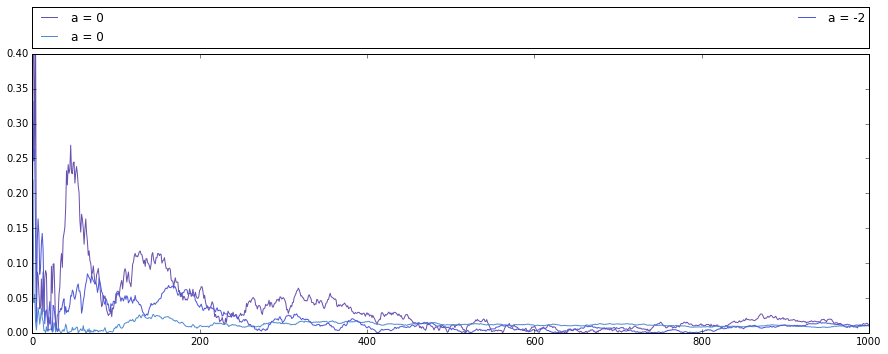

In [117]:
drawer(norm_alpha, norm_locs, 'a')


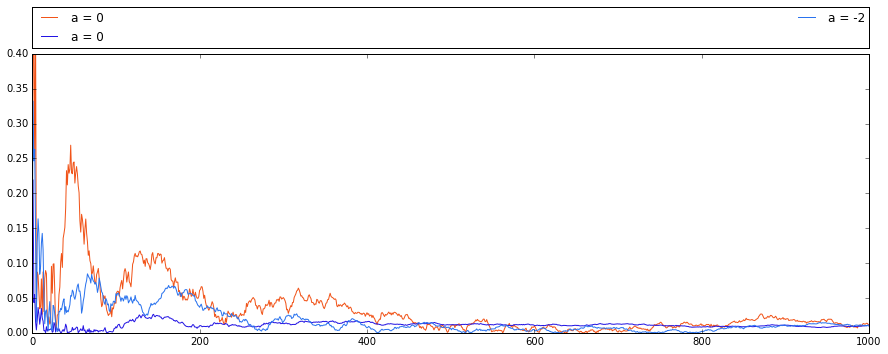

In [116]:
plt.figure(figsize=(15, 5))
for u in range(3) :
    plt.plot(dots, [f(norm_alpha[u][j], norm_locs[u]) for j in xrange(1000)],\
    color = color_generator(), label = labels_norm[u])
    plt.ylim(0, 0.4)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()


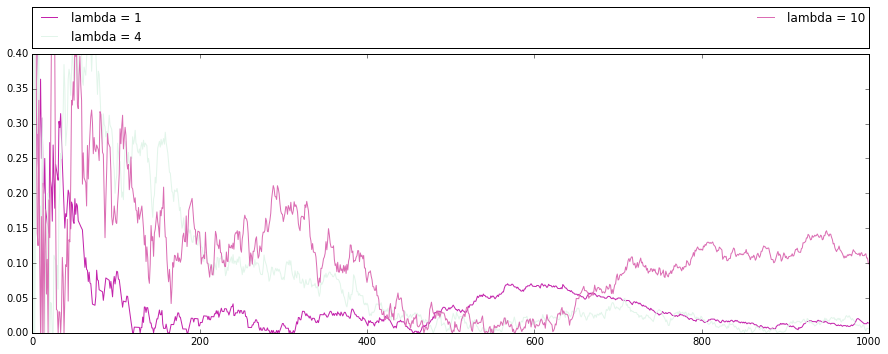

In [118]:
drawer(poisson_lambda, poisson_param, 'lambda')



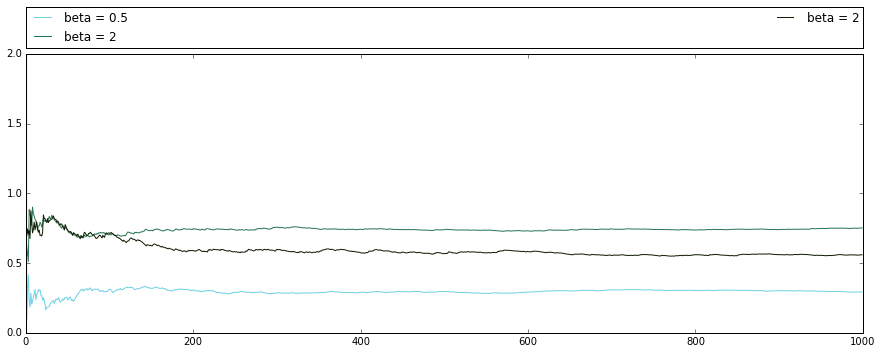

In [119]:
drawer(beta_lambda_1, beta_real_1, 'beta', 2)

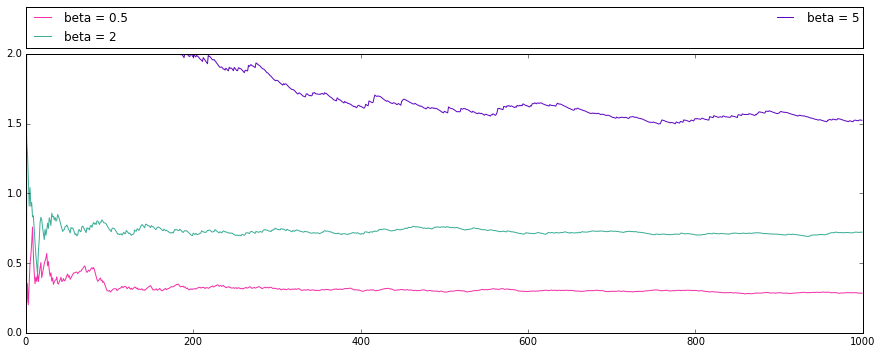

In [120]:
drawer(beta_lambda_2, beta_real_2, 'beta', 2)

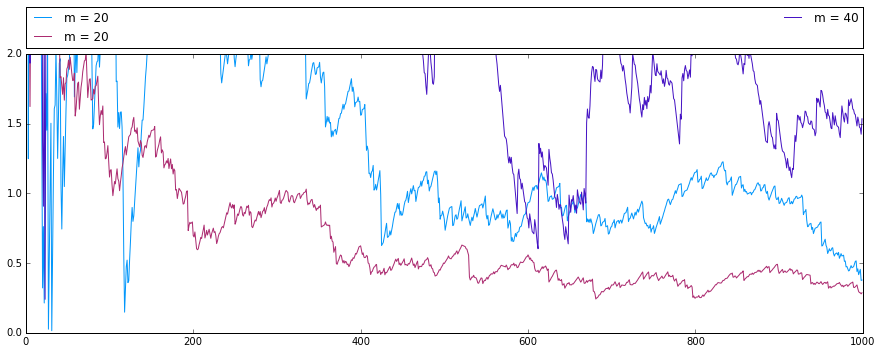

In [121]:
drawer(binomial_m, binomial_real_m, 'm', 2)

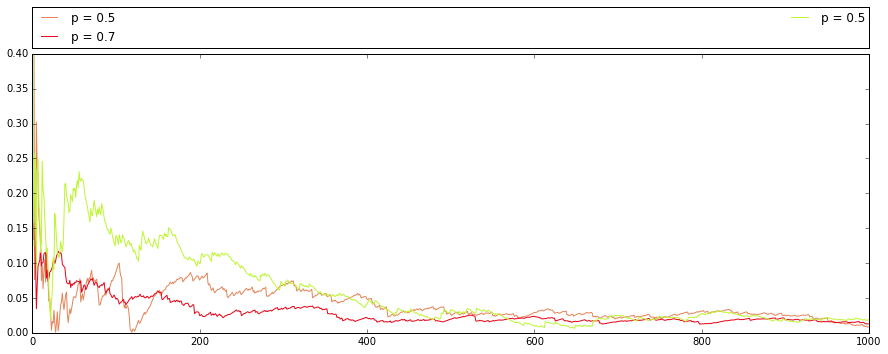

In [122]:
drawer(binomial_p, binomial_real_p, 'p')

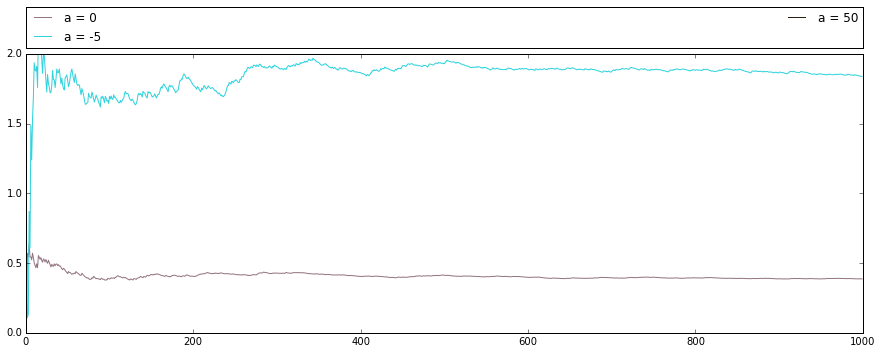

In [124]:
drawer(uniform_a, uniform_real_a, 'a', 2)

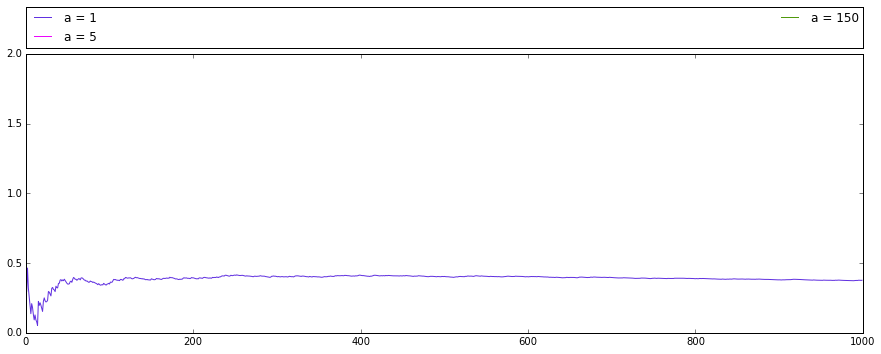

In [125]:
drawer(uniform_b, uniform_real_b, 'a', 2)

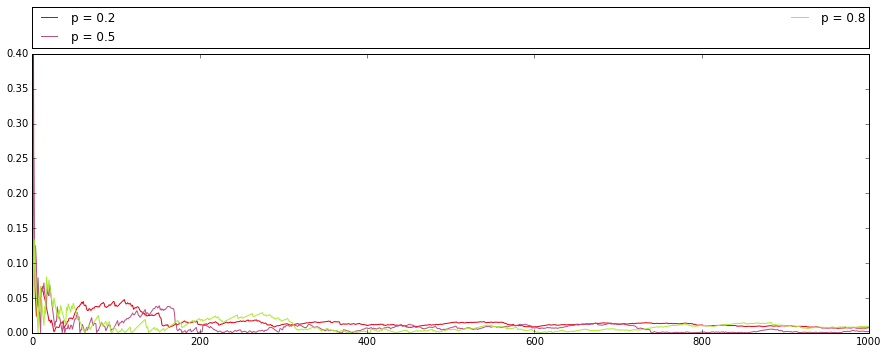

In [126]:
drawer(geom_p, geom_param, 'p')

## а так же построим графики модуля разности с ОМП

# method of likelyhood plots

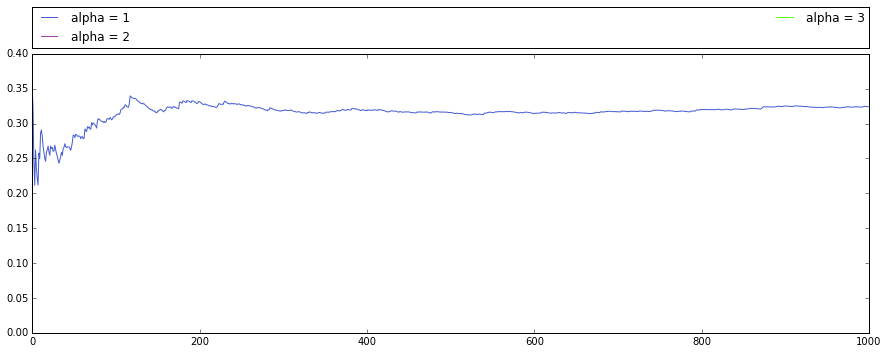

In [137]:
drawer(gamma_alpha_like, gamma_real_alpha, 'alpha')

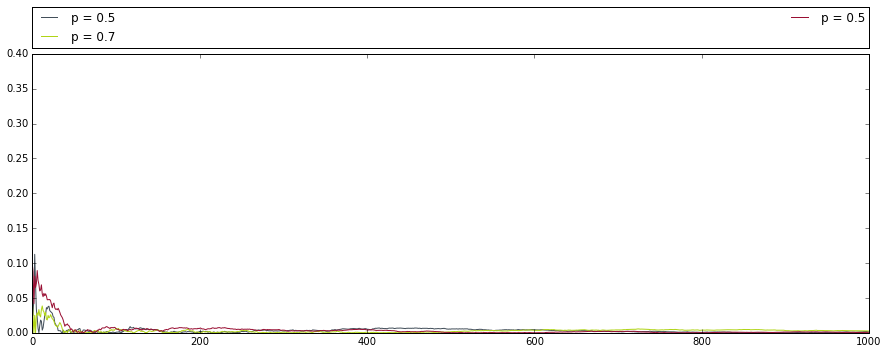

In [140]:
drawer(binomial_p_like, binomial_real_p, 'p')

# generim bootstrap for moments


In [ ]:
bootstrap_number = 1000

In [ ]:
norm_bootstrap = []
for j in range(3)
    norm_bootstrap